In [16]:
from qiskit import *
from qiskit_aer import AerSimulator
import numpy as np
from qiskit_aer.noise import NoiseModel, depolarizing_error
#from qiskit_experiments import *
from qiskit.quantum_info import state_fidelity
from copy import deepcopy
from qiskit.visualization import plot_histogram

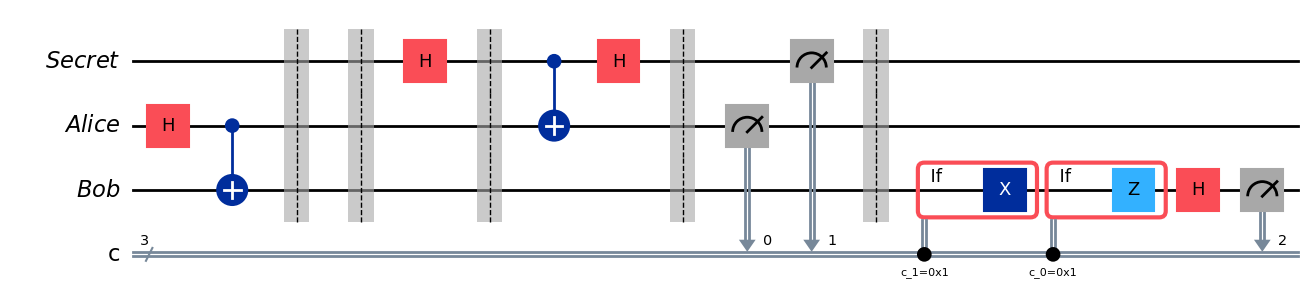

In [17]:
# Registradores quânticos
Secret = QuantumRegister(1, 'Secret')
Alice = QuantumRegister(1, 'Alice')
Bob = QuantumRegister(1, 'Bob')
c = ClassicalRegister(3, 'c')  

circuit = QuantumCircuit(Secret,Alice,Bob,c)

circuit.h(Alice)
circuit.cx(Alice, Bob)
circuit.barrier()

circuit.barrier()
circuit.h(Secret)
circuit.barrier()

circuit.cx(Secret, Alice)
circuit.h(Secret)
circuit.barrier()

circuit.measure(Alice, c[0])
circuit.measure(Secret, c[1])
circuit.barrier()

with circuit.if_test((c[1], 1)):  # Alice
    circuit.x(Bob)
with circuit.if_test((c[0], 1)):  # Secret
    circuit.z(Bob)

circuit.h(Bob)
circuit.measure(Bob, c[2])

circuit.draw('mpl')

In [18]:
backend = AerSimulator()

noise_model = NoiseModel()
erro1 = depolarizing_error(0.01,1)
erro2 = depolarizing_error(0.1,2)

noise_model.add_all_qubit_quantum_error(erro1,['h','x','z'])
noise_model.add_all_qubit_quantum_error(erro2,['cx','swap'])

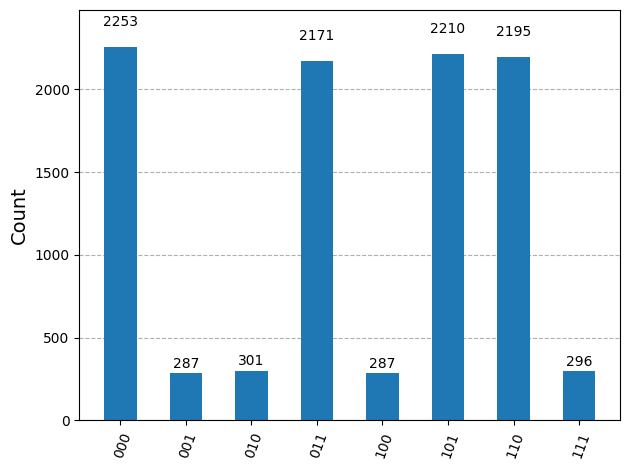

In [19]:
transpiled = transpile(circuit, backend)
result = backend.run(transpiled, shots=10000, noise_model=noise_model).result()
counts = result.get_counts()

plot_histogram(counts)

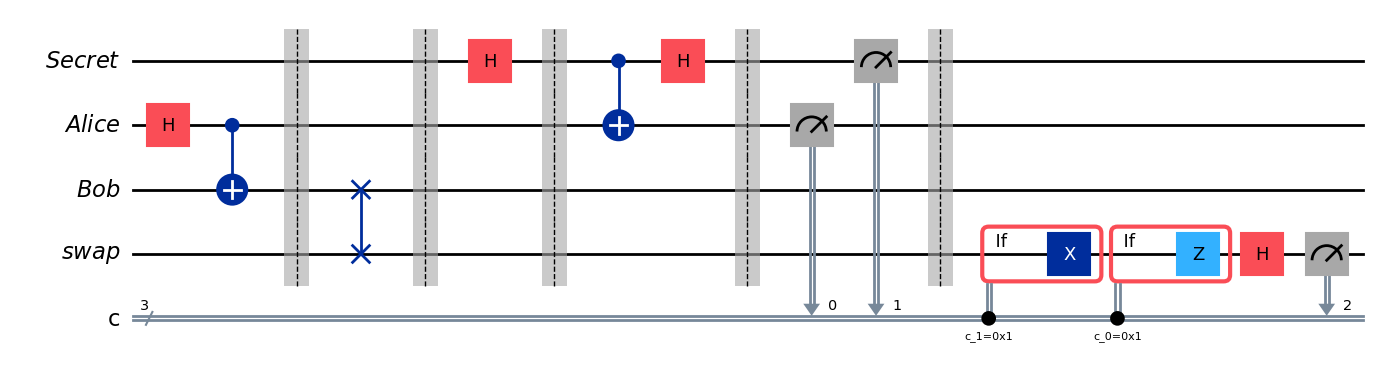

In [20]:
# Registradores quânticos
Secret = QuantumRegister(1, 'Secret')
Alice = QuantumRegister(1, 'Alice')
Bob = QuantumRegister(1, 'Bob')
new_bob = QuantumRegister(1,'swap')
c = ClassicalRegister(3, 'c')  

circuit_Swap = QuantumCircuit(Secret,Alice,Bob,new_bob,c)

circuit_Swap.h(Alice)
circuit_Swap.cx(Alice, Bob)
circuit_Swap.barrier()

circuit_Swap.swap(Bob,new_bob)

circuit_Swap.barrier()
circuit_Swap.h(Secret)
circuit_Swap.barrier()

circuit_Swap.cx(Secret, Alice)
circuit_Swap.h(Secret)
circuit_Swap.barrier()

circuit_Swap.measure(Alice, c[0])
circuit_Swap.measure(Secret, c[1])
circuit_Swap.barrier()

with circuit_Swap.if_test((c[1], 1)):  # Alice
    circuit_Swap.x(new_bob)
with circuit_Swap.if_test((c[0], 1)):  # Secret
    circuit_Swap.z(new_bob)

circuit_Swap.h(new_bob)
circuit_Swap.measure(new_bob, c[2])

circuit_Swap.draw('mpl')

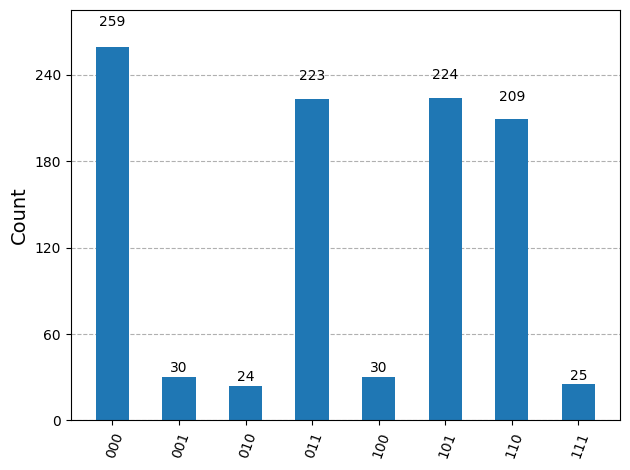

In [58]:
transpiled = transpile(circuit_Swap, backend)
result = backend.run(transpiled, shots=1024, noise_model=noise_model).result()
counts = result.get_counts()

plot_histogram(counts)

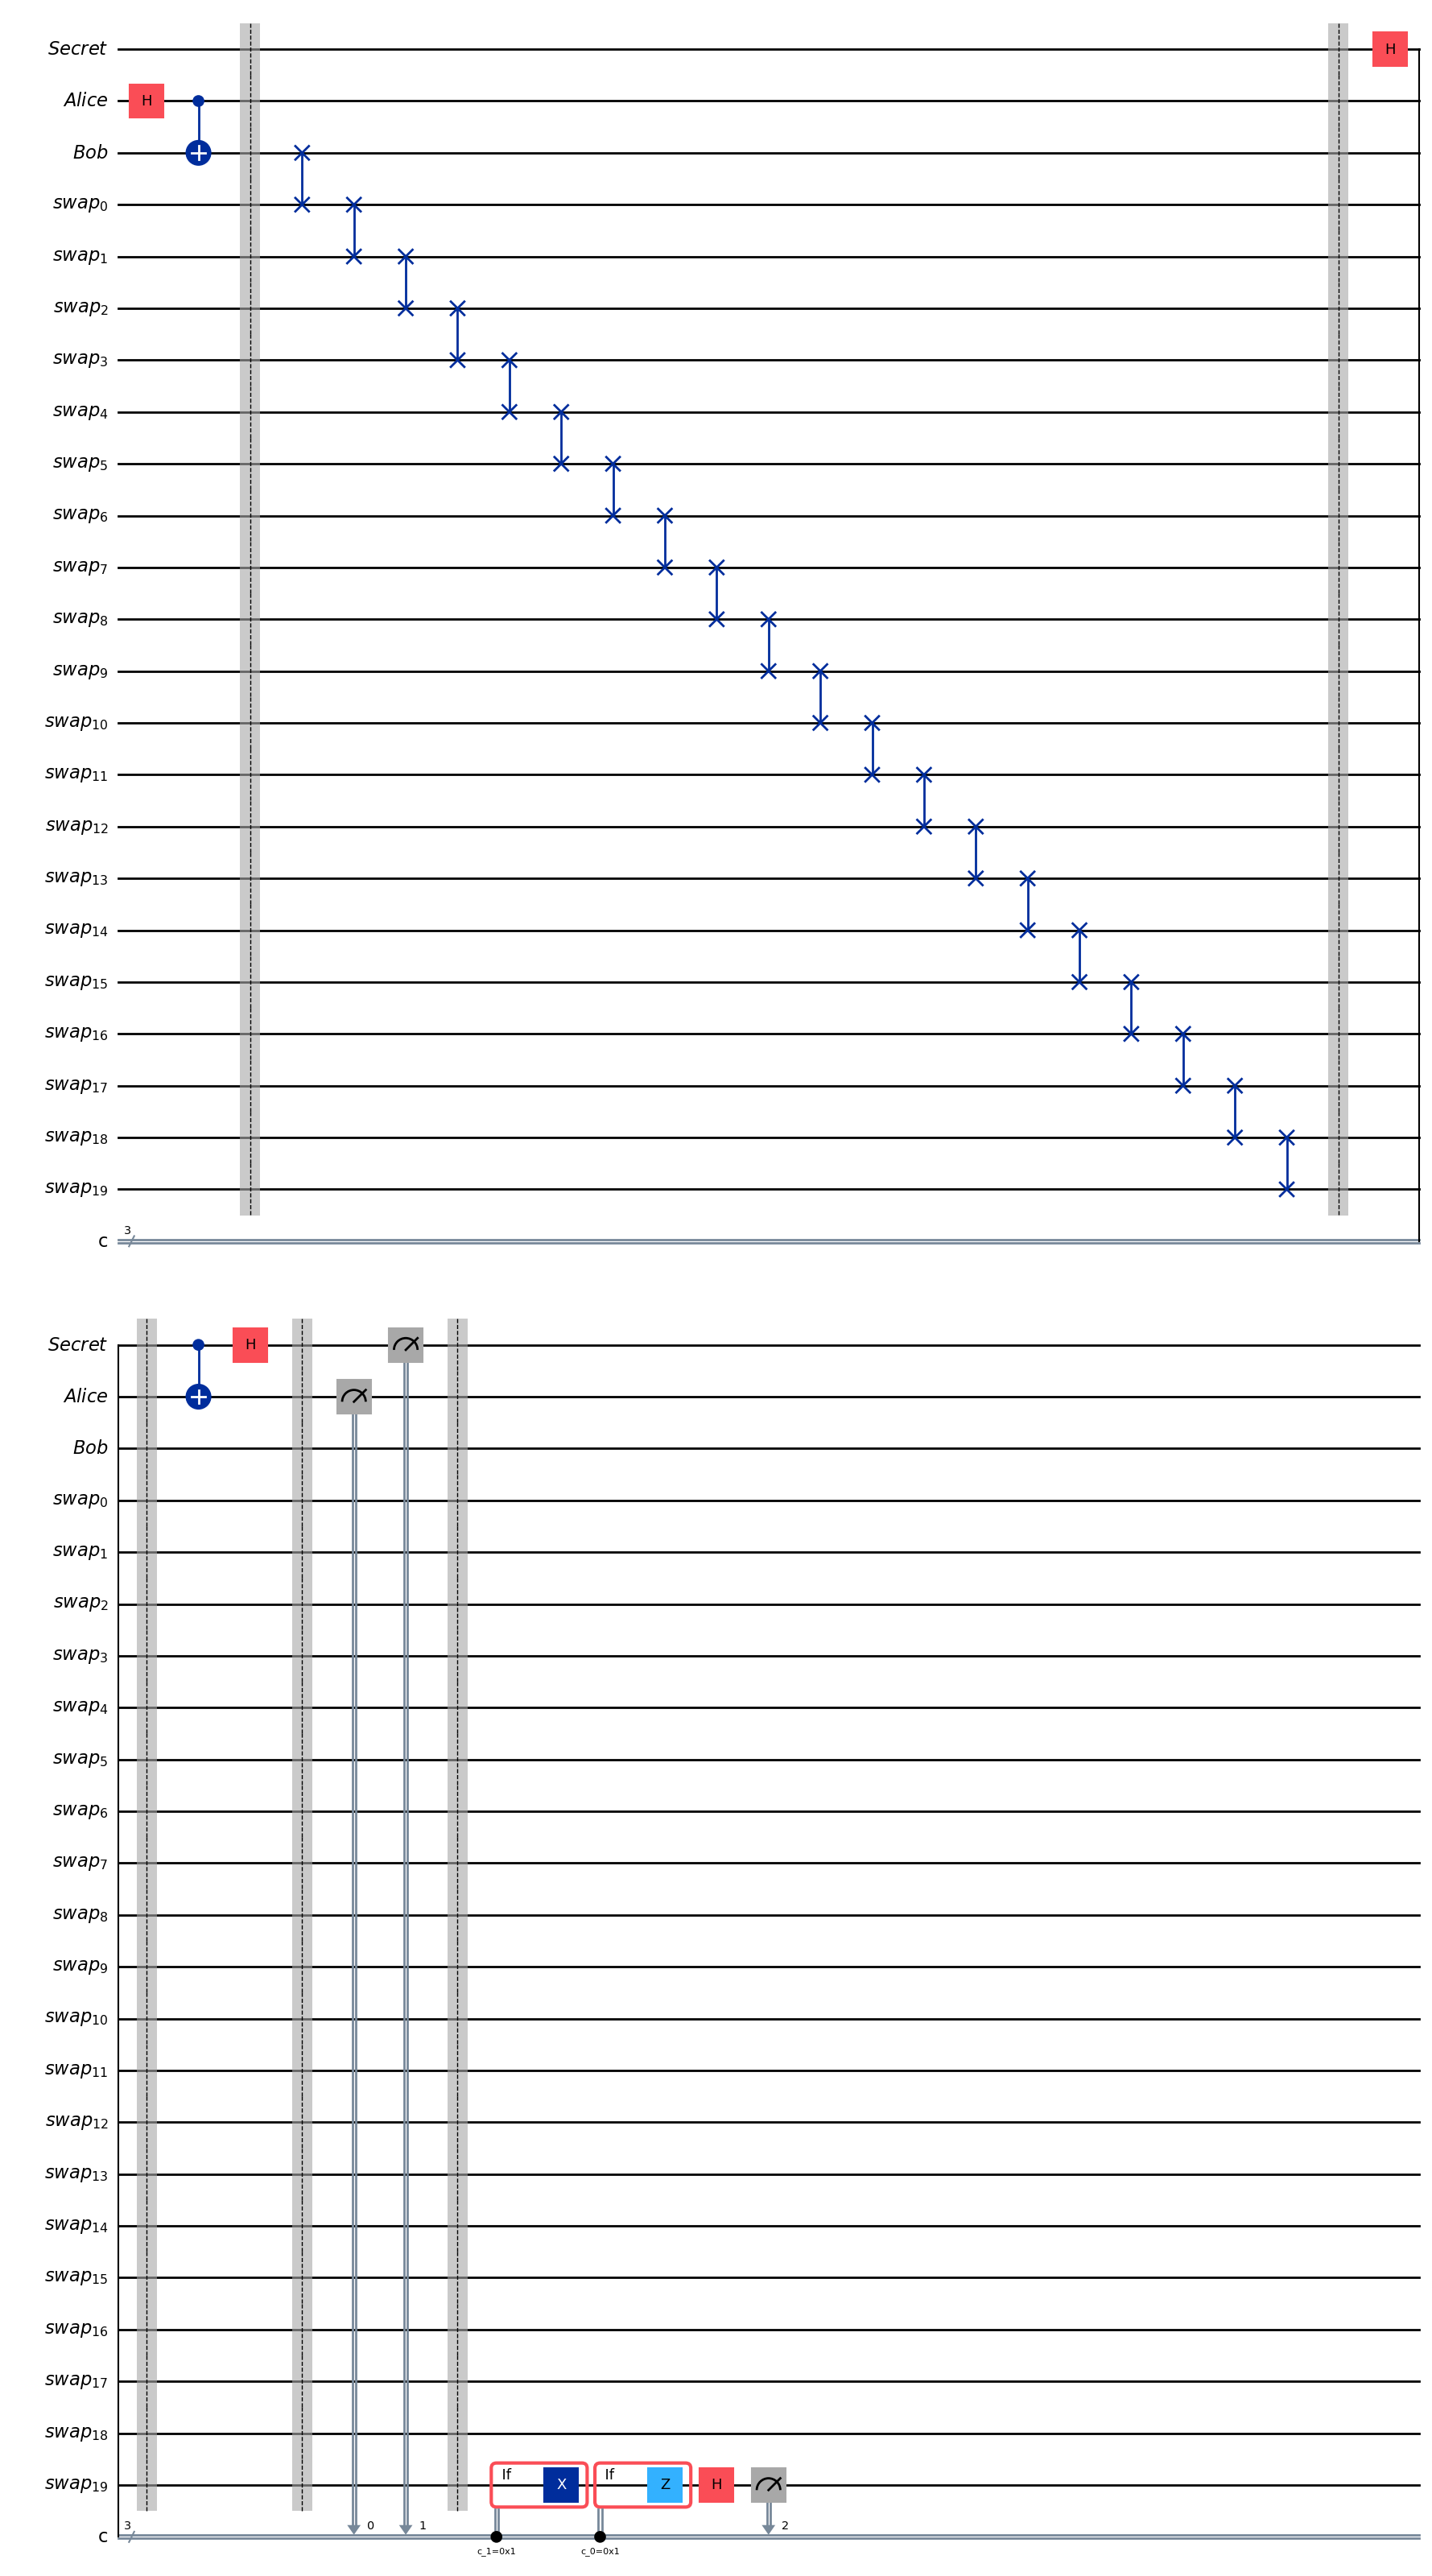

In [22]:
# Registradores quânticos
Secret = QuantumRegister(1, 'Secret')
Alice = QuantumRegister(1, 'Alice')
Bob = QuantumRegister(1, 'Bob')
new_bob = QuantumRegister(20,'swap')
c = ClassicalRegister(3, 'c')  

circuit_Swap_20 = QuantumCircuit(Secret,Alice,Bob,new_bob,c)

circuit_Swap_20.h(Alice)
circuit_Swap_20.cx(Alice, Bob)
circuit_Swap_20.barrier()

#Swap a partir de bob
i=2
for i in range(2,22):
    circuit_Swap_20.swap(i,i+1)

circuit_Swap_20.barrier()
circuit_Swap_20.h(Secret)
circuit_Swap_20.barrier()

circuit_Swap_20.cx(Secret, Alice)
circuit_Swap_20.h(Secret)
circuit_Swap_20.barrier()

circuit_Swap_20.measure(Alice, c[0])
circuit_Swap_20.measure(Secret, c[1])
circuit_Swap_20.barrier()

with circuit_Swap_20.if_test((c[1], 1)):  # Alice
    circuit_Swap_20.x(22)
with circuit_Swap_20.if_test((c[0], 1)):  # Secret
    circuit_Swap_20.z(22)

circuit_Swap_20.h(22)
circuit_Swap_20.measure(22, c[2])
circuit_Swap_20.draw('mpl')

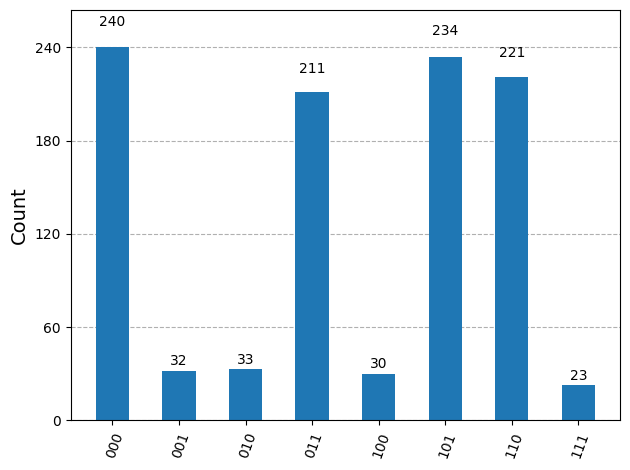

In [53]:
transpiled = transpile(circuit_Swap, backend)
result = backend.run(transpiled, shots=1024, noise_model=noise_model).result()
counts = result.get_counts()

plot_histogram(counts)

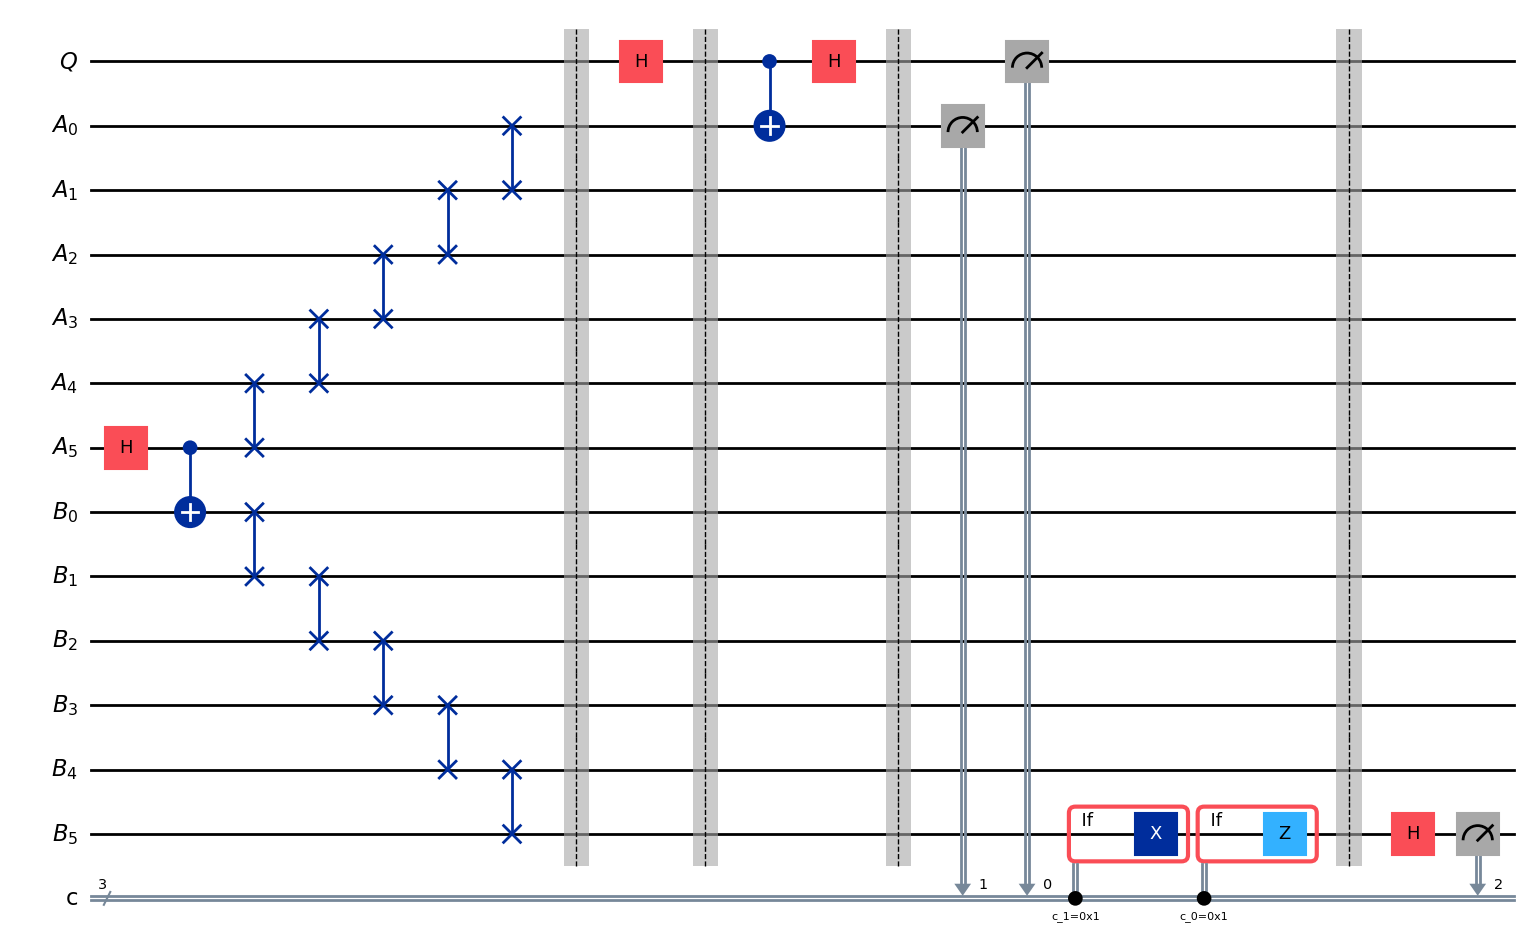

In [36]:
# Step 1: Map
 
# Define registers
qr = QuantumRegister(13, "q")
cr = ClassicalRegister(3, "c")
qc = QuantumCircuit(qr, cr)
 
 
 
 
# Define registers
secret = QuantumRegister(1, "Q")
ebitsa = QuantumRegister(6, "A")
ebitsb = QuantumRegister(6, "B")
# q = ClassicalRegister(1, "q meas")
# a = ClassicalRegister(1, "a")
# b = ClassicalRegister(1, "b")
cr = ClassicalRegister(3, "c")
qc = QuantumCircuit(secret, ebitsa, ebitsb, cr)
 
# We'll start Alice in the middle of the circuit, then move information outward in both directions.
Alice = 5
Bob = 0
qc.h(ebitsa[Alice])
qc.cx(ebitsa[Alice], ebitsb[Bob])
 
# Starting with Bob and Alice in the center, we swap their information onto adjacent qubits, until the information is on distant qubits.
 
for n in range(Alice):
    qc.swap(ebitsb[Bob], ebitsb[Bob + 1])
    qc.swap(ebitsa[Alice], ebitsa[Alice - 1])
    Alice = Alice - 1
    Bob = Bob + 1
 
qc.barrier()
 

qc.h(secret)
qc.barrier()
 
# Entangle Alice's two qubits
qc.cx(secret, ebitsa[Alice])
qc.h(secret)
 
qc.barrier()
 
# Make measurements of Alice's qubits and store the results in the classical register.
qc.measure(ebitsa[Alice], cr[1])
qc.measure(secret, cr[0])
 
# Send instructions to Bob's qubits based on the outcome of Alice's measurements.
with qc.if_test((cr[1], 1)):
    qc.x(ebitsb[Bob])
with qc.if_test((cr[0], 1)):
    qc.z(ebitsb[Bob])
 
qc.barrier()
 
# Invert the preparation we did for Carl's qubit so we can check whether we did this correctly.
qc.h(ebitsb[Bob])  # inverse of u(theta,varphi,0.0)
qc.measure(ebitsb[Bob], cr[2])  # add measurement gate
 
qc.draw("mpl")

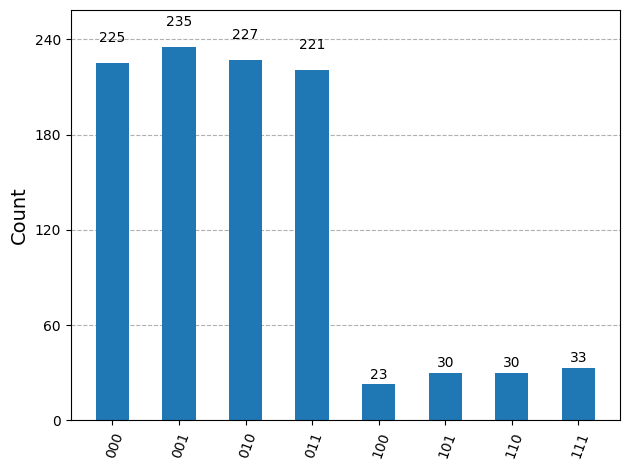

In [37]:
transpiled = transpile(qc, backend)
result = backend.run(transpiled, shots=1024, noise_model=noise_model).result()
counts = result.get_counts()

plot_histogram(counts)

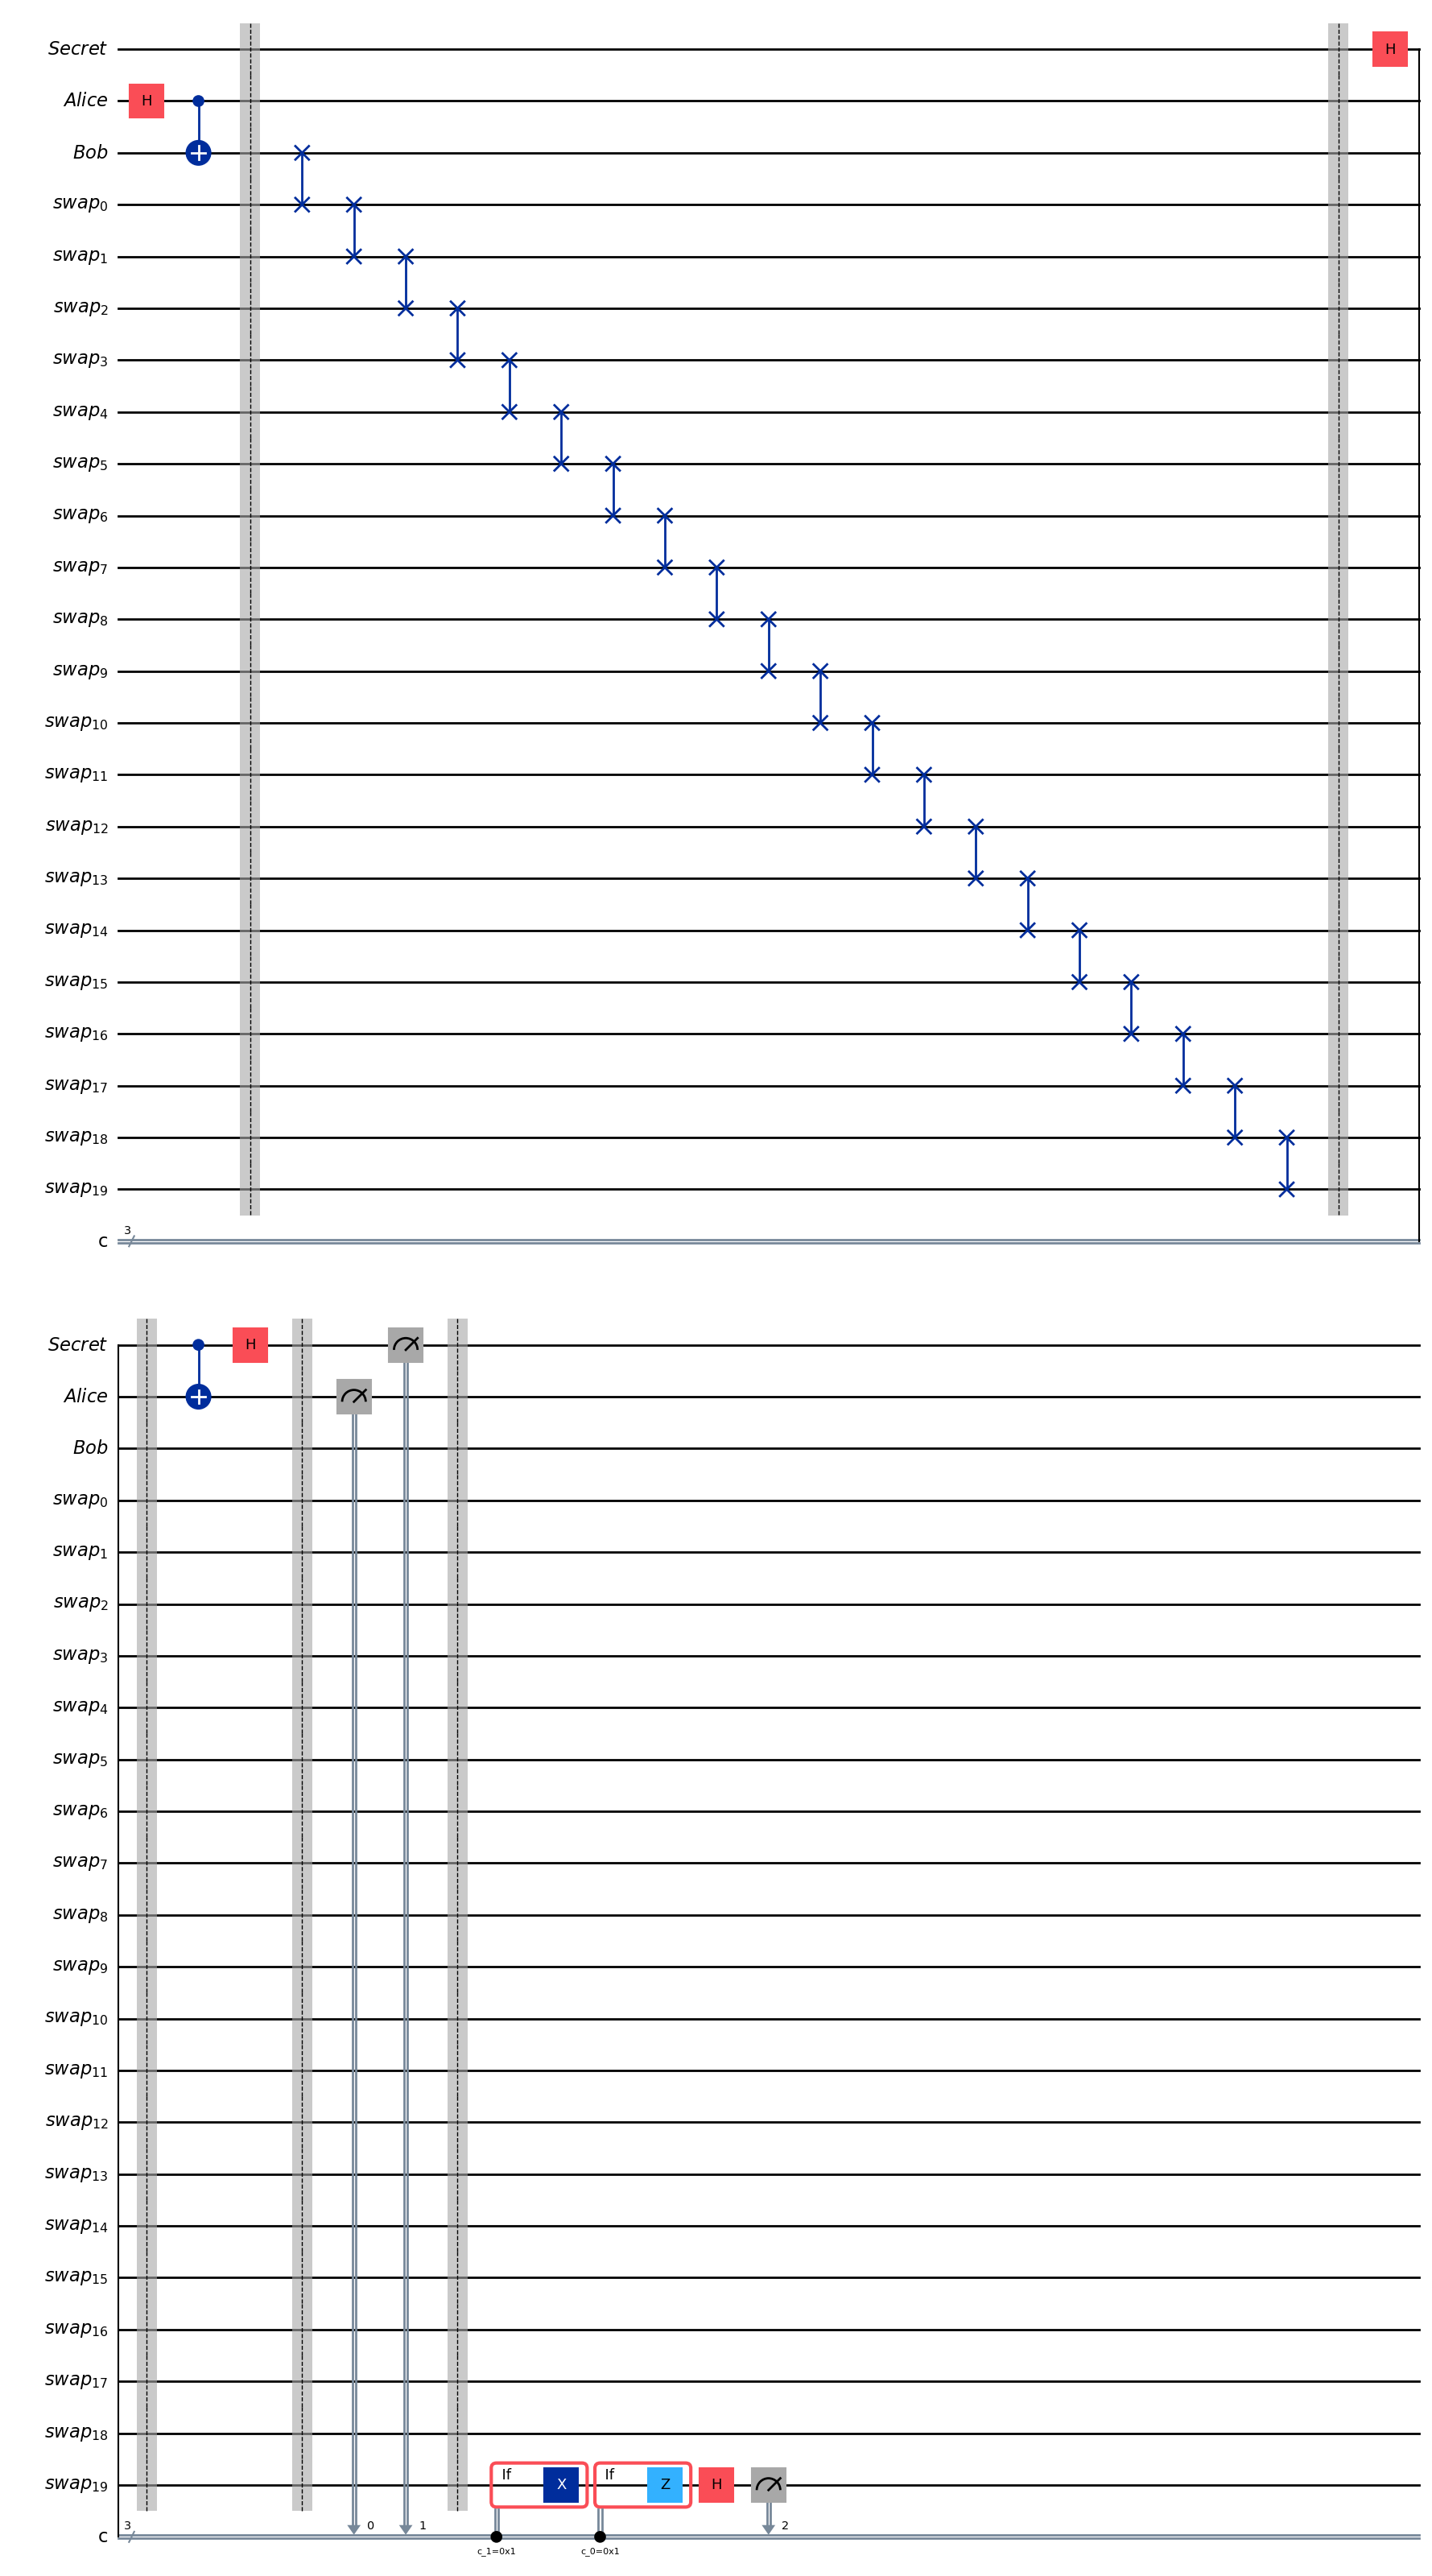

In [46]:
# Registradores quânticos
Secret = QuantumRegister(1, 'Secret')
Alice = QuantumRegister(1, 'Alice')
Bob = QuantumRegister(1, 'Bob')
new_bob = QuantumRegister(20,'swap')
c = ClassicalRegister(3, 'c')  

circuit_Swap_22 = QuantumCircuit(Secret,Alice,Bob,new_bob,c)

circuit_Swap_22.h(Alice)
circuit_Swap_22.cx(Alice, Bob)
circuit_Swap_22.barrier()

#Swap a partir de bob
i=2
for i in range(2,22):
    circuit_Swap_22.swap(i,i+1)

circuit_Swap_22.barrier()
circuit_Swap_22.h(Secret)
circuit_Swap_22.barrier()

circuit_Swap_22.cx(Secret, Alice)
circuit_Swap_22.h(Secret)
circuit_Swap_22.barrier()

circuit_Swap_22.measure(Alice, c[0])
circuit_Swap_22.measure(Secret, c[1])
circuit_Swap_22.barrier()

with circuit_Swap_22.if_test((c[1], 1)):  # Alice
    circuit_Swap_22.x(22)
with circuit_Swap_22.if_test((c[0], 1)):  # Secret
    circuit_Swap_22.z(22)

circuit_Swap_22.h(22)
circuit_Swap_22.measure(22, c[2])
circuit_Swap_22.draw('mpl')

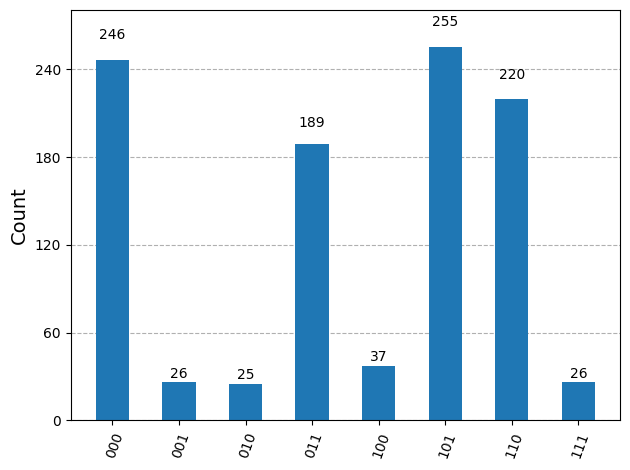

In [47]:
transpiled = transpile(circuit_Swap_22, backend)
result = backend.run(transpiled, shots=1024, noise_model=noise_model).result()
counts = result.get_counts()

plot_histogram(counts)

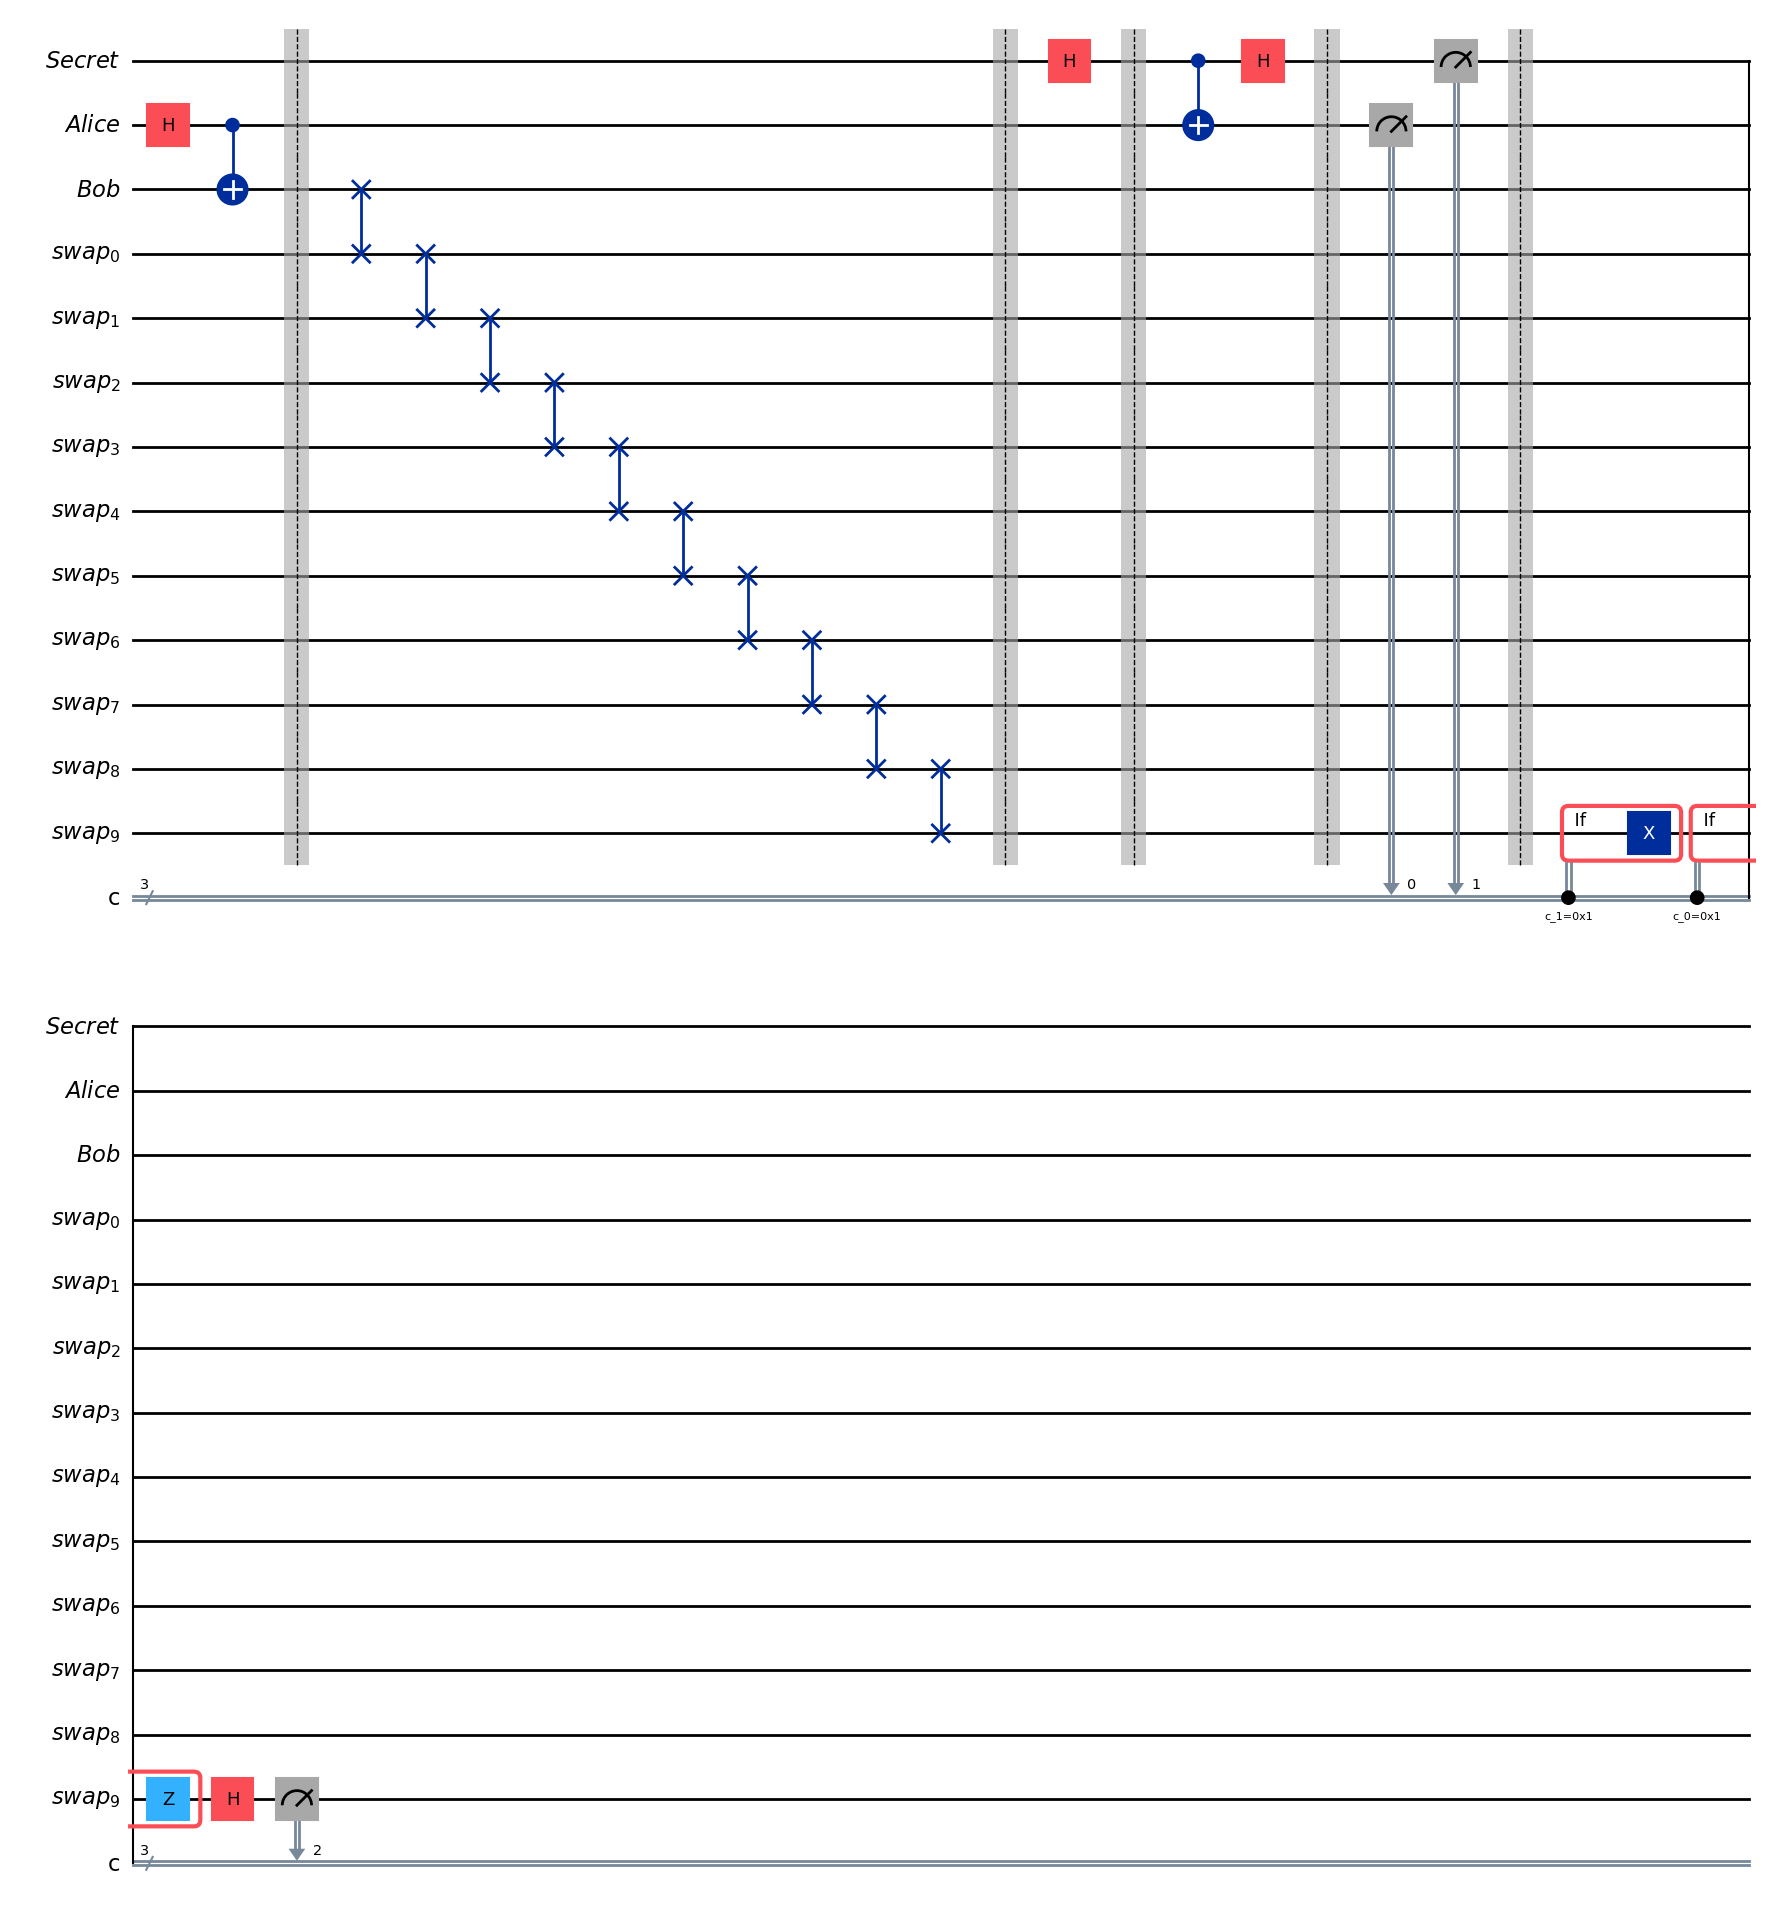

In [51]:
# Registradores quânticos
Secret = QuantumRegister(1, 'Secret')
Alice = QuantumRegister(1, 'Alice')
Bob = QuantumRegister(1, 'Bob')
new_bob = QuantumRegister(10,'swap')
c = ClassicalRegister(3, 'c')  

circuit_Swap_22 = QuantumCircuit(Secret,Alice,Bob,new_bob,c)

circuit_Swap_22.h(Alice)
circuit_Swap_22.cx(Alice, Bob)
circuit_Swap_22.barrier()

#Swap a partir de bob
i=2
for i in range(2,12):
    circuit_Swap_22.swap(i,i+1)

circuit_Swap_22.barrier()
circuit_Swap_22.h(Secret)
circuit_Swap_22.barrier()

circuit_Swap_22.cx(Secret, Alice)
circuit_Swap_22.h(Secret)
circuit_Swap_22.barrier()

circuit_Swap_22.measure(Alice, c[0])
circuit_Swap_22.measure(Secret, c[1])
circuit_Swap_22.barrier()

with circuit_Swap_22.if_test((c[1], 1)):  # Alice
    circuit_Swap_22.x(12)
with circuit_Swap_22.if_test((c[0], 1)):  # Secret
    circuit_Swap_22.z(12)

circuit_Swap_22.h(12)
circuit_Swap_22.measure(12, c[2])
circuit_Swap_22.draw('mpl')

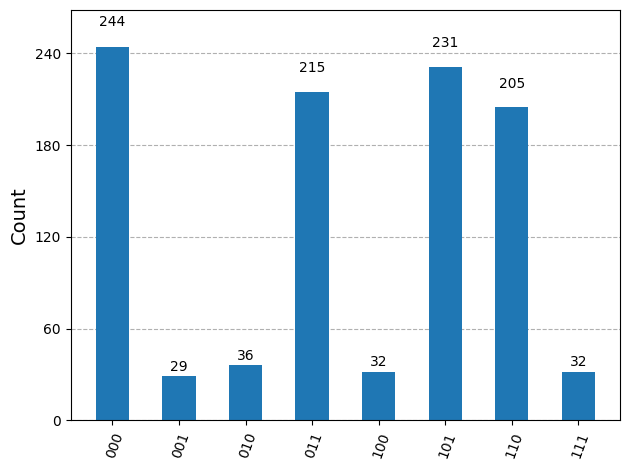

In [52]:
transpiled = transpile(circuit_Swap_22, backend)
result = backend.run(transpiled, shots=1024, noise_model=noise_model).result()
counts = result.get_counts()

plot_histogram(counts)